In [3]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
cwd = os.getcwd()

Matlab provides a high-quality uniform random number generator rand, but you can write a simple one on your own.

(a) Implement a linear congruential random number generator following the instructions in Seydel’s Course Notes, Section 2.1 A, page 202.

In [4]:

def linear_cong_gen(N_0,a,b,M,n):
    N = np.zeros(n)
    N[0] = N_0 % M
    for i in range(1,n):
        N[i] = ((a*N[i-1] + b) % M )
        U = N/M
    return U

u = linear_cong_gen( N_0 = 1000 ,M = 244944, a = 1597, b = 51749, n =10000)

(b) Test it building a histogram of the empirical probability density function fU (x)
and a scatter plot in the (Ui−1, Ui) plane with the good parameters of page 203
and with the pathologic parameters of pages 208–209.

Text(0, 0.5, 'Density')

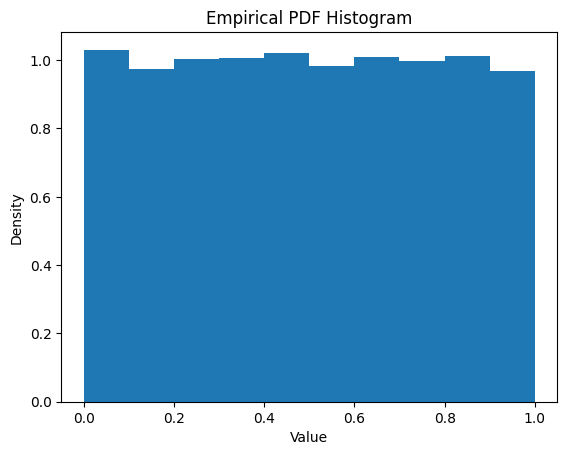

In [5]:
plt.hist(u, density = True)
plt.xlabel('Value')
plt.title('Empirical PDF Histogram')
plt.ylabel('Density')


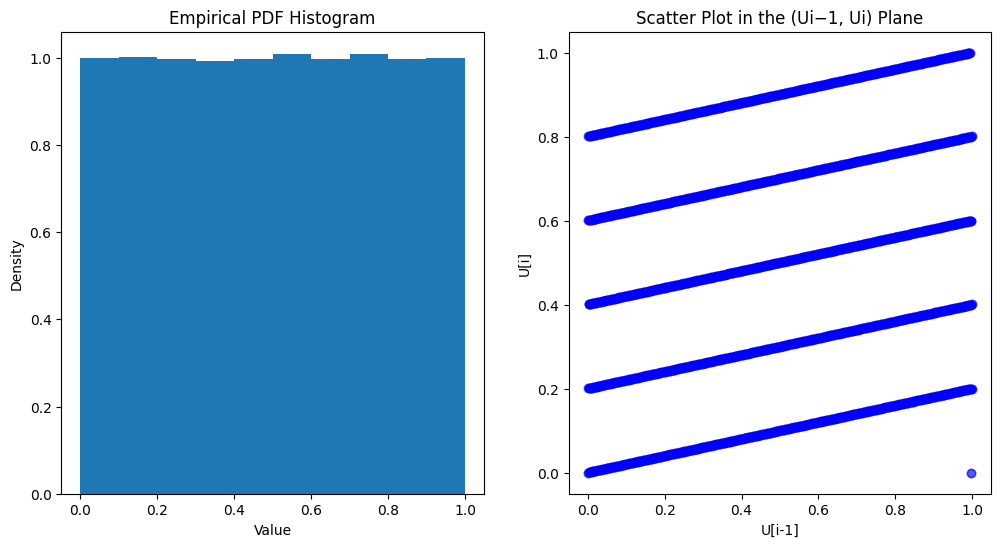

In [6]:
def linear_cong_gen(N_0,a,b,M,n):
    N = np.zeros(n)
    N[0] = N_0 % M
    for i in range(1,n):
        N[i] = ((a*N[i-1] + b) % M ) 
        U = N/M

    fig, ax = plt.subplots(1,2,figsize=(12, 6))
    ax[0].hist(U, density = True)
    ax[0].set_xlabel('Value')
    ax[0].set_title('Empirical PDF Histogram')
    ax[0].set_ylabel('Density')

    ax[1].scatter(U[:-1], U[1:], alpha=0.2, color='b')
    ax[1].set_title('Scatter Plot in the (Ui−1, Ui) Plane')
    ax[1].set_xlabel('U[i-1]')
    ax[1].set_ylabel('U[i]')
    
    return plt.show()


linear_cong_gen( N_0 = 1000 ,M = 2048, a = 1229, b = 1, n =10000)

2.  If U is a uniform random number on [−π/2, π/2], what is the distribution of X =cos U? Find out

(a) analytically with the transformation formula (watch out because the cosine is
not monotonic, so you distinguish between the interval where it increases and
the interval where it decreases);

(b) numerically, sampling an appropriate quantity of uniform random numbers,
taking their cosine, and building a histogram.

Text(0, 0.5, 'Density')

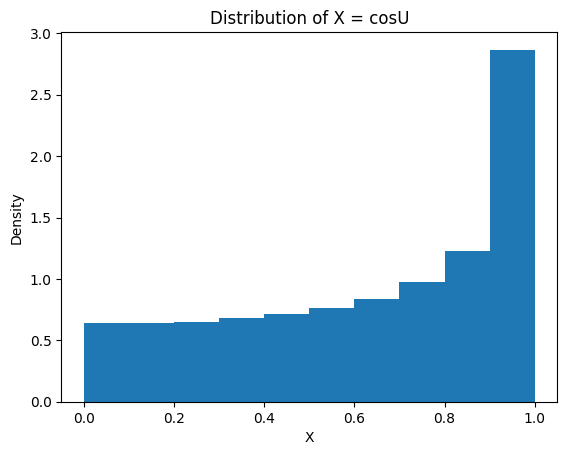

In [7]:
p = np.pi/2
U_2 = np.random.uniform(-p,p,1000000)
trans_u = np.cos(U_2)

plt.hist(trans_u, density = True)
plt.title("Distribution of X = cosU")
plt.xlabel("X")
plt.ylabel("Density")




ValueError: `bins` must increase monotonically, when an array

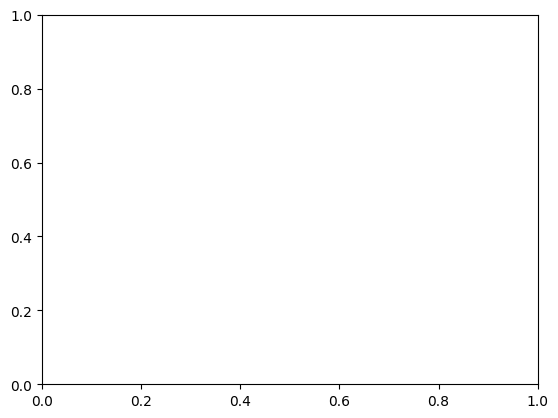

In [21]:
x = np.linspace(-1, 1, 1000000)


plt.hist(x,trans_u)

TypeError: 'tuple' object is not callable

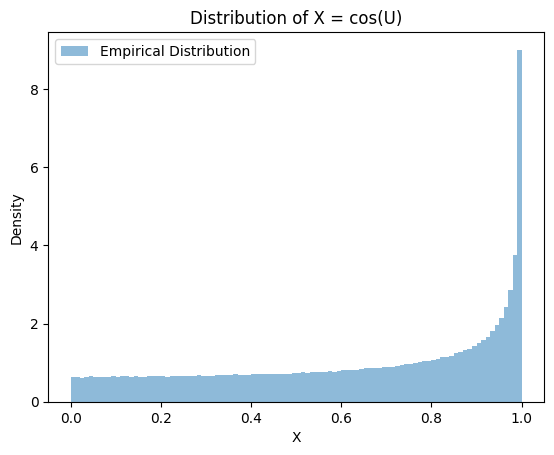

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
p = np.pi / 2
U_2 = np.random.uniform(-p, p, 1000000)
trans_u = np.cos(U_2)


plt.hist(trans_u, bins=100, density=True, alpha=0.5, label='Empirical Distribution')


# Label the plot
plt.title("Distribution of X = cos(U)")
plt.xlabel("X")
plt.ylabel("Density")
plt.legend()
plt.xlim(0, 1)
# Show the plot
plt.show()


3. Starting from the linear congruential uniform random number generator that you
wrote in Assignment 1.2, implement the Fibonacci generator described in Seydel’s
Course Notes, Section 2.1 B, pages 211–212, and reproduce the scatter plot on page
213.

In [106]:
def linear_cong_gen(N_0,a,b,M,n):
    N = np.zeros(n)
    N[0] = N_0 % M
    for i in range(1,n):
        N[i] = ((a*N[i-1] + b) % M ) 
        U = N/M    
    return U

seed= linear_cong_gen(N_0 =10,a=1366,b=150889,M = 714025,n = 17)

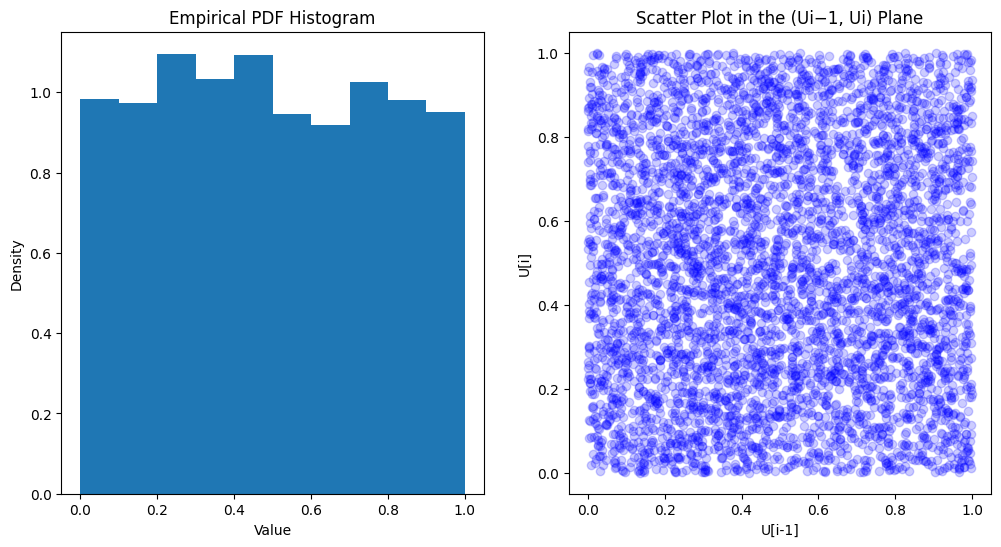

In [130]:
def fibonacci_gen(seed, mu, vu, n):
    i = mu
    j = vu -1

    while len(seed) < n:
        i = vu if i == 0 else i-1 
        j = vu if j == 0 else j-1
        zi = seed[j] - seed[i]

        if zi <0:
              zi += 1
        seed = np.insert(seed, i, zi)

    fig, ax = plt.subplots(1,2,figsize=(12, 6))
    ax[0].hist(seed, density = True)
    ax[0].set_xlabel('Value')
    ax[0].set_title('Empirical PDF Histogram')
    ax[0].set_ylabel('Density')

    ax[1].scatter(seed[:-1], seed[1:], alpha=0.2, color='b')
    ax[1].set_title('Scatter Plot in the (Ui−1, Ui) Plane')
    ax[1].set_xlabel('U[i-1]')
    ax[1].set_ylabel('U[i]')
    return plt.show() 

fibonacci_gen(seed = seed, vu = 17, mu = 5, n = 5000)

4. Obtain standard normal random numbers starting from standard uniform random numbers using the rejection method using the Laplace (or double exponential) distribution as the majorant function.

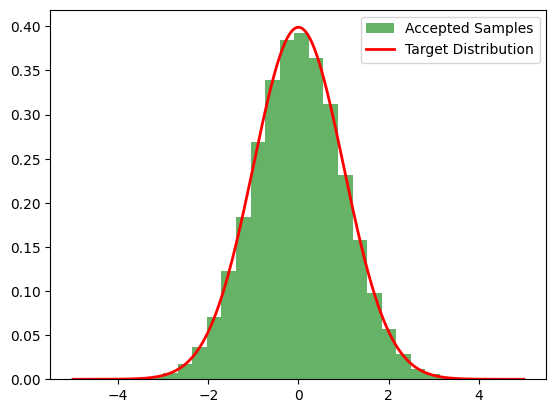

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, laplace

def target_distribution(x):
    return norm.pdf(x, loc=0, scale=1)

def proposal_distribution():
    return np.random.laplace(loc=0, scale=1)

def acceptance_rejection(n):
    samples = []
    c = 1.6
    while len(samples) < n:
        x_proposal = proposal_distribution()
        u = np.random.uniform(0,1)
        if u * c * laplace.pdf(x_proposal) <= target_distribution(x_proposal):
            samples.append(x_proposal)
    return samples


# Generate samples
num_samples = 100000
samples = acceptance_rejection(num_samples)

# Plotting the results
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g', label='Accepted Samples')
x = np.linspace(-5, 5, 1000)
plt.plot(x, target_distribution(x), 'r-', lw=2, label='Target Distribution')
plt.legend()
plt.show()

    